In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import where as IF
%matplotlib inline
sns.set_context('talk')
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

1. Import claims_data.csv and cust_data.csv which is provided to you and
combine the two datasets appropriately to create a 360-degree view of
the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv(r"claims.csv")
cust_demo = pd.read_csv(r"cust_demographics.csv")


2. Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.

In [3]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
df = pd.merge(right = claims,
                   left = cust_demo, 
                   right_on = "customer_id", 
                   left_on = "CUST_ID",
                   how = "outer"
                  )
df.drop(columns = ["customer_id"], inplace = True)
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


3)Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.






In [5]:
df["DateOfBirth"] = pd.to_datetime(df.DateOfBirth, format = "%d-%b-%y")
df.loc[(df.DateOfBirth.dt.year > 2020),"DateOfBirth"]=df[df.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
df["claim_date"] = pd.to_datetime(df.claim_date, format = "%m/%d/%Y")
df["Contact"] = pd.to_numeric(df.Contact.str.replace("-",""),downcast='float')
df["claim_amount"] = pd.to_numeric(df.claim_amount.str.replace("$",""),downcast='float')
df.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [6]:
df.dtypes

CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float32
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

4)Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [7]:

df["flag"] = IF(df.police_report == "No", 0 ,
                    IF(df.police_report == "Yes", 1, np.nan))
df.drop(columns = ["police_report"], inplace = True)
df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaT,NaN,NaN,NaN,97727122.0,Other driver error,2017-06-11,Auto,Material only,3059.0,4.0,Yes,0.0
1103,NaN,NaN,NaT,NaN,NaN,NaN,10247193.0,Natural causes,2018-03-14,Auto,Material only,1520.0,2.0,No,0.0
1104,NaN,NaN,NaT,NaN,NaN,NaN,79807493.0,Other driver error,2018-02-09,Auto,Material and injury,23575.0,2.0,Yes,0.0
1105,NaN,NaN,NaT,NaN,NaN,NaN,69299345.0,Other causes,2018-03-21,Auto,Material and injury,25120.0,1.0,No,NaN


5)One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column


In [8]:
df = df.groupby('CUST_ID').first().reset_index(drop = True)
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,1965-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,Injury only,21480.0,1.0,No,0.0
1081,Female,1966-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Material and injury,14360.0,1.0,No,1.0
1082,Female,1963-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,Material only,1242.0,1.0,Yes,0.0
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,Material only,2415.0,2.0,Yes,0.0


6)Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [9]:
df.isna().sum()

gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
flag                   299
dtype: int64

In [10]:
catagorical_col = ["gender","State","Segment","incident_cause","claim_area","claim_type","fraudulent","flag"]
continious_col = ["claim_amount"]

In [11]:
for col in catagorical_col:
    df[col] = df[col].fillna(df[col].mode()[0])
df[continious_col] = df[continious_col].fillna(df[continious_col].mean())
df.head()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0


In [12]:
df.isna().sum()

gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          0
claim_date              7
claim_area              0
claim_type              0
claim_amount            0
total_policy_claims    17
fraudulent              0
flag                    0
dtype: int64

7)Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria Children < 18 Youth 18-30 Adult 30-60 Senior > 60

In [13]:
df["Age"] = round((df.claim_date - df.DateOfBirth).apply(lambda x: x.days)/365.25, 0)

In [14]:
df

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.501953,1.0,Yes,0.0,40.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.0
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,47.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Male,1965-01-28,UT,5.175625e+09,Silver,4549014.0,Other causes,2018-07-07,Auto,Injury only,21480.000000,1.0,No,0.0,53.0
1081,Female,1966-06-19,HI,4.577521e+09,Gold,35453672.0,Natural causes,2018-01-06,Auto,Material and injury,14360.000000,1.0,No,1.0,52.0
1082,Female,1963-11-18,NC,6.432465e+09,Silver,37305754.0,Natural causes,2018-04-04,Auto,Material only,1242.000000,1.0,Yes,0.0,54.0
1083,Male,1995-06-08,OR,3.952466e+09,Gold,22960702.0,Driver error,2017-11-13,Auto,Material only,2415.000000,2.0,Yes,0.0,22.0


In [15]:
df["Age_grp"] = IF(df.Age < 18, "Children",
                        IF(df.Age < 30, "Youth",
                         IF(df.Age < 60, "Adult",
                          IF(df.Age < 100, "Senior", "NaN"
                           
                          )
                         )
                        )
                       )
df["Age_grp"] = df["Age_grp"].fillna(df["Age_grp"].mode())
df.groupby(by = "Age_grp").count()

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
Age_grp,,,,,,,,,,,,,,,
Adult,758,758,758,758,758,758,758,758,758,758,758,750,758,758,758
Children,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
NaN,7,7,7,7,7,0,7,0,7,7,7,0,7,7,0
Youth,318,318,318,318,318,318,318,318,318,318,318,316,318,318,318


8)What is the average amount claimed by the customers from various segments?


In [16]:
df.groupby(by = "Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12755.710938
Platinum,12370.138672
Silver,12271.163086


9)What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [17]:

df.loc[df.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_")

incident_cause
total_Crime                  724462.5
total_Driver error          3264286.0
total_Natural causes        1312706.0
total_Other causes          3725038.5
total_Other driver error    3318806.5
Name: claim_amount, dtype: float32

10)How many adults from TX, DE and AK claimed insurance for driver related issues and causes?


In [18]:
df.loc[(df.incident_cause.str.lower().str.contains("driver") 
    & ((df.State == "TX") | (df.State == "DE") | (df.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

11)Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


In [19]:
gender_segment = df.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()

In [20]:
gender_segment = gender_segment.pivot(index = "Segment", columns = "gender", values = "claim_amount")

In [21]:
gender_segment

gender,Female,Male
Segment,,
Gold,2122234.0,2622890.5
Platinum,2381974.0,2120756.5
Silver,1935970.0,2346666.0


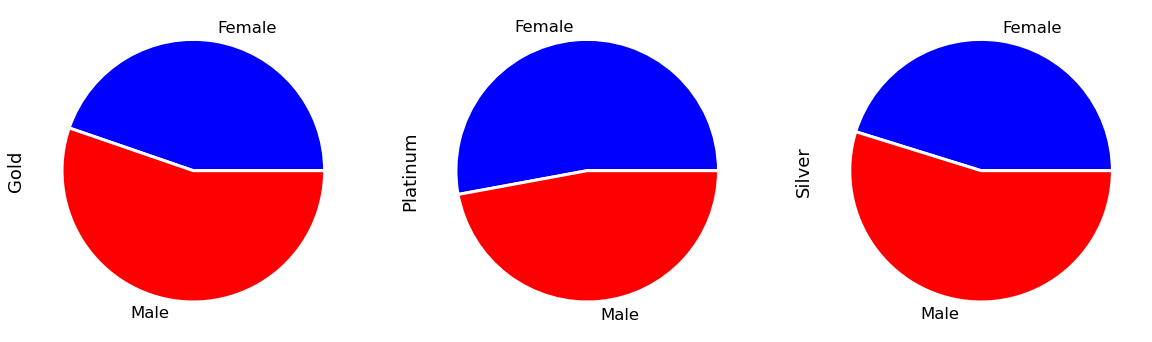

In [22]:
gender_segment.T.plot(kind = "pie", subplots = True, legend = False, figsize = (20,8),colors=( "blue", "red"),wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },)
plt.show()

12)Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart



In [23]:
gender_count = df.loc[(df.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_suffix(" count").reset_index()
gender_count

,gender,gender count
0,Female,221
1,Male,280


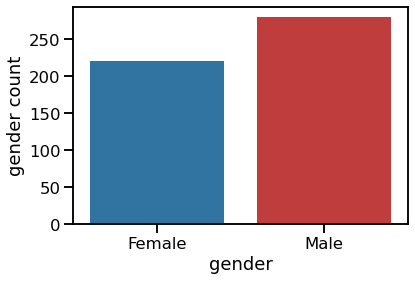

In [24]:
sns.barplot(x = "gender", y = "gender count", data = gender_count,color = 'red', palette = ['tab:blue', 'tab:red'] )
plt.show()

13)Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


In [25]:
Age_Fraud = df.groupby(by = "Age_grp")[["fraudulent"]].count().reset_index()
Age_Fraud

,Age_grp,fraudulent
0,Adult,758
1,Children,2
2,NaN,7
3,Youth,318


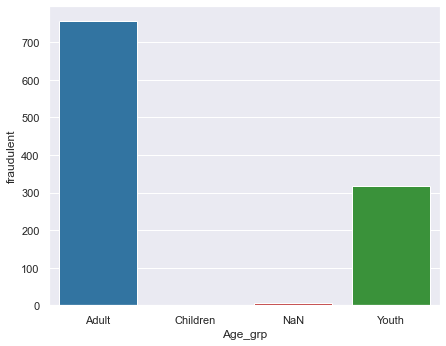

In [26]:
sns.set(rc = {'figure.figsize':(7,5.5)})
sns.barplot(x = "Age_grp", y = "fraudulent", data = Age_Fraud,color = 'blue', palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green']) 
plt.show()

14)Visualize the monthly trend of the total amount that has been claimed by the customers.Ensure that on the "month" axis, the month is in a chronological order not alphabetical order


In [27]:
monthly_trend = df.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()
monthly_trend['Monthly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
monthly_trend['Yearly'] = monthly_trend['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
monthly_trend_data = monthly_trend.groupby(["Monthly"])[["claim_amount"]].sum().reset_index()
monthly_trend_data

,Monthly,claim_amount
0,April,1276071.5
1,August,911203.5
2,December,696701.5
3,February,1133107.0
4,January,1332012.0
5,July,1379035.0
6,June,1276333.0
7,March,1320094.0
8,May,1114211.5
9,November,601125.0


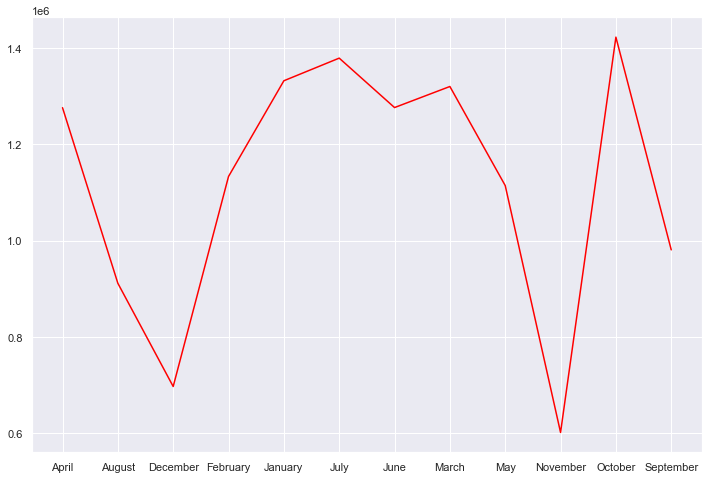

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(monthly_trend_data['Monthly'], monthly_trend_data['claim_amount'], label = 'Trend Line',color=("red"))

15)What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.



In [29]:
Avg_Claim = df.groupby(["gender","Age_grp","fraudulent"])[["claim_amount"]].mean().reset_index()
Avg_Claim

,gender,Age_grp,fraudulent,claim_amount
0,Female,Adult,No,12409.596680
1,Female,Adult,Yes,12348.010742
2,Female,Children,No,20200.000000
3,Female,NaN,No,12470.501953
4,Female,Youth,No,12398.187500
5,Female,Youth,Yes,7756.771484
6,Male,Adult,No,12150.460938
7,Male,Adult,Yes,17062.199219
8,Male,Children,No,24610.000000
9,Male,NaN,No,12470.501953


In [30]:
Avg_Claim_Male = Avg_Claim.loc[ Avg_Claim.gender == 'Male', ['claim_amount','Age_grp','fraudulent'] ]
Avg_Claim_Female = Avg_Claim.loc[ Avg_Claim.gender == 'Female', ['claim_amount','Age_grp','fraudulent'] ]

In [31]:
Male_fraud = Avg_Claim_Male.loc[ Avg_Claim.fraudulent == 'Yes', ['claim_amount','Age_grp'] ]
Male_nonfraud = Avg_Claim_Male.loc[ Avg_Claim.fraudulent == 'No', ['claim_amount','Age_grp'] ]
Female_fraud = Avg_Claim_Female.loc[ Avg_Claim.fraudulent == 'Yes', ['claim_amount','Age_grp'] ]
Female_nonfraud = Avg_Claim_Female.loc[ Avg_Claim.fraudulent == 'No', ['claim_amount','Age_grp'] ]

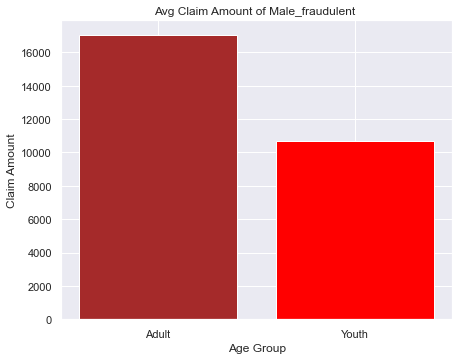

In [32]:
plt.bar(Male_fraud.Age_grp , Male_fraud.claim_amount,color=("brown","red"))
plt.title('Avg Claim Amount of Male_fraudulent ')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.show()

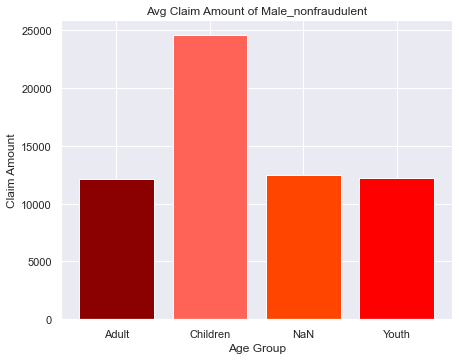

In [33]:
plt.bar(Male_nonfraud.Age_grp , Male_nonfraud.claim_amount,color=("#8B0000","#FF6357","#FF4500","#FF0000"))
        
plt.title('Avg Claim Amount of Male_nonfraudulent')

plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.show()

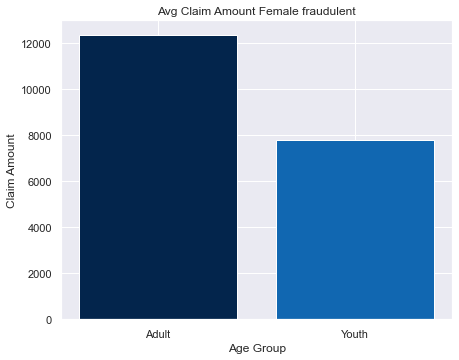

In [34]:
plt.bar(Female_fraud.Age_grp , Female_fraud.claim_amount,color=("#03254c","#1167b1"))
plt.title('Avg Claim Amount Female fraudulent')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.show()

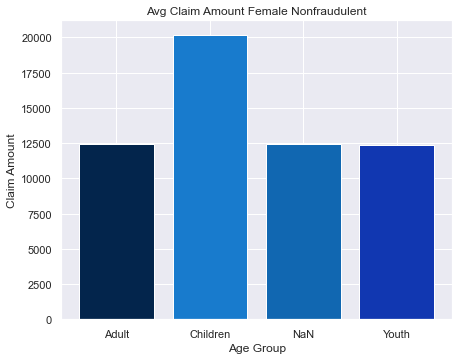

In [35]:
plt.bar(Female_nonfraud.Age_grp , Female_nonfraud.claim_amount,color=("#03254c","#187bcd","#1167b1","#1137b1"))
plt.title('Avg Claim Amount Female Nonfraudulent')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.show()

16)Is there any similarity in the amount claimed by males and females?


In [36]:
df.gender.value_counts()

Male      553
Female    532
Name: gender, dtype: int64

In [37]:
df_Gender = df.groupby(["gender", "claim_date"])[["claim_amount"]].sum().reset_index()

In [38]:
df_Gender['Monthly'] = df_Gender['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
df_Gender['Yearly'] = df_Gender['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [39]:
df_Gender.head()

,gender,claim_date,claim_amount,Monthly,Yearly
0,Female,2017-01-01,119620.000000,January,2017
1,Female,2017-01-07,4576.500000,January,2017
2,Female,2017-01-14,85203.000000,January,2017
3,Female,2017-01-21,23379.501953,January,2017
4,Female,2017-01-27,6507.500000,January,2017


In [40]:
Claim_amt = 'claim_amount'

male_spend = df_Gender.loc[ df_Gender.gender == "Male", Claim_amt ]
female_spend = df_Gender.loc[df_Gender.gender == "Female", Claim_amt ]

print( 'mean of male spend: ', male_spend.mean(), '| mean of female spend: ', female_spend.mean() )

mean of male spend:  71367.390625 | mean of female spend:  63778.25390625


In [41]:
stats.ttest_ind( male_spend, female_spend )

Ttest_indResult(statistic=1.3269766899056947, pvalue=0.18605236930923746)

In [42]:
stats.f_oneway( male_spend, female_spend )

F_onewayResult(statistic=1.760868249357575, pvalue=0.186052230728328)

In [43]:
print (" Inference: Pvalue is > 0.05. Therefoe, we accept Null Hypothesis H0 and There is no relationship between the amount claimed by males and females" )

 Inference: Pvalue is > 0.05. Therefoe, we accept Null Hypothesis H0 and There is no relationship between the amount claimed by males and females


17)Is there any relationship between age category and segment?


In [44]:
obs_freq = pd.crosstab( df.Segment, df.Age_grp )
obs_freq

Age_grp,Adult,Children,NaN,Youth
Segment,,,,
Gold,268,1,1,102
Platinum,244,1,3,116
Silver,246,0,3,100


In [45]:
stats.chi2_contingency( obs_freq )

(4.202535990127086,
 0.6492889827669297,
 6,
 array([[259.88571429,   0.68571429,   2.4       , 109.02857143],
        [254.29677419,   0.67096774,   2.3483871 , 106.68387097],
        [243.81751152,   0.64331797,   2.2516129 , 102.2875576 ]]))

In [46]:
print (" Inference: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship between age category and segment" )

 Inference: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship between age category and segment


18)The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was $10,000.


In [47]:
df_new =  df.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()

In [48]:
df_new['Monthly'] = df_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
df_new['Yearly'] = df_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
df_new

,claim_date,claim_amount,Monthly,Yearly
0,2017-01-01,203227.0,January,2017
1,2017-01-07,137763.5,January,2017
2,2017-01-14,138807.5,January,2017
3,2017-01-21,72576.5,January,2017
4,2017-01-27,57928.0,January,2017
...,...,...,...,...
95,2018-10-03,162797.5,October,2018
96,2018-10-09,225007.5,October,2018
97,2018-10-16,119829.0,October,2018
98,2018-10-23,147084.0,October,2018


In [49]:
df_new_2017 = df_new.loc[ df_new.Yearly == '2017', 'claim_amount' ].mean()
df_new_2017

133465.859375

In [50]:
df_new_2018 = df_new.loc[df_new.Yearly == '2018', 'claim_amount' ]
df_new_2018.head()

55    200633.0
56    246348.0
57    164961.5
58    109767.0
59    115168.0
Name: claim_amount, dtype: float32

In [51]:
stats.ttest_1samp( df_new_2018, 100000 )

Ttest_1sampResult(statistic=4.623132209540581, pvalue=3.310963329742883e-05)

In [52]:
print("We reject the null hypothesis, Spend on the Insurance Claims has increased from last year spend of $100,000")

We reject the null hypothesis, Spend on the Insurance Claims has increased from last year spend of $100,000


19. Is there any difference between age groups and insurance claims?

In [53]:
df.Age_grp.nunique()

4

In [54]:
df.Age_grp.value_counts()

Adult       758
Youth       318
NaN           7
Children      2
Name: Age_grp, dtype: int64

In [55]:
Claims = 'claim_amount'
s1 = df.loc[ df.Age_grp == 'Adult', Claims ]
s2 = df.loc[ df.Age_grp == 'Youth', Claims ]
s3 = df.loc[ df.Age_grp == 'NaN', Claims ]
s4 = df.loc[ df.Age_grp == 'Children', Claims ]

In [56]:
print( 'Count s1:', s1.mean(), '| Count s2:', s2.mean(), '| Count s3:', s3.mean(), 
       '| Count s3:', s4.mean() )

Count s1: 12807.7373046875 | Count s2: 11604.1796875 | Count s3: 12470.5009765625 | Count s3: 22405.0


In [57]:
stats.f_oneway( s1, s2, s3, s4 )

F_onewayResult(statistic=0.9807714600637603, pvalue=0.4010198300701352)

In [58]:
print (" Inference: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship between age groups and insurance claims" )

 Inference: Pvalue is > 0.05. Hence we accept Null Hypothesis H0 and There is no relationship between age groups and insurance claims


20)Is there any relationship between total number of policy claims and theclaimed amount?

In [59]:
df.total_policy_claims.value_counts()

1.0    781
2.0    104
3.0     86
4.0     58
5.0     27
6.0      9
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [60]:
usage = 'claim_amount'
s1 = df.loc[ df.total_policy_claims == 1.0, usage ]
s2 = df.loc[ df.total_policy_claims == 2.0, usage ]
s3 = df.loc[ df.total_policy_claims == 3.0, usage ]
s4 = df.loc[ df.total_policy_claims == 4.0, usage ]
s5 = df.loc[ df.total_policy_claims == 5.0, usage ]
s6 = df.loc[ df.total_policy_claims == 6.0, usage ]
s7 = df.loc[ df.total_policy_claims == 7.0, usage ]
s8 = df.loc[ df.total_policy_claims == 8.0, usage ]

In [61]:
print( 'mean s1:', s1.mean(), '| mean s2:', s2.mean(), '| mean s3:', s3.mean(),'mean s4:', s4.mean(), 
       '| mean s5:', s5.mean(), '| mean s6:', s6.mean(),'|mean s7:', s7.mean(), '| mean s8:', s2.mean(), '| mean s8:', s3.mean() )

mean s1: 12403.6552734375 | mean s2: 13876.4521484375 | mean s3: 12928.19140625 mean s4: 11049.724609375 | mean s5: 8530.462890625 | mean s6: 15657.8330078125 |mean s7: 23033.0 | mean s8: 13876.4521484375 | mean s8: 12928.19140625


In [62]:
stats.f_oneway( s1, s2, s3, s4, s5, s6, s7, s8 )

F_onewayResult(statistic=0.9303871872119974, pvalue=0.4818261589585725)

In [63]:
print (" Inference: Hence we accept Null Hypothesis H0 and There is a relationship between total number of policy claims and the claimed amounts" )

 Inference: Hence we accept Null Hypothesis H0 and There is a relationship between total number of policy claims and the claimed amounts
